Name:V.NAVYA

Register Number:212221230069

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

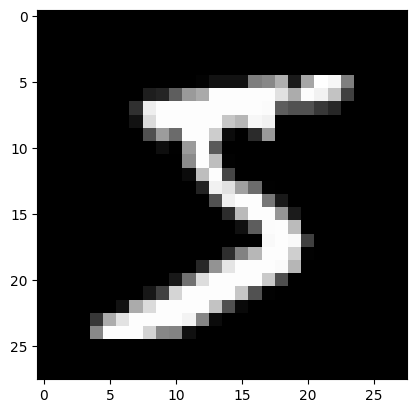

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

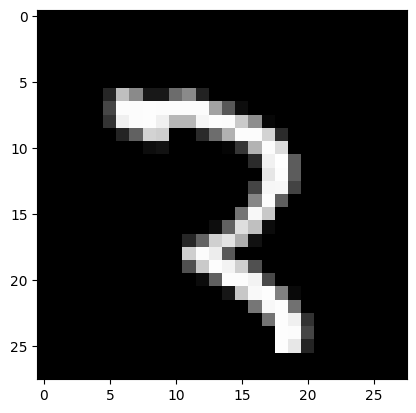

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

Name: V.NAVYA

Register Number:212221230069

In [ ]:

model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 173738 (678.66 KB)
Trainable params: 173738 (678.66 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 25s 25ms/step - loss: 0.2482 - accuracy: 0.9289 - val_loss: 0.0988 - val_accuracy: 0.9709
Epoch 2/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0803 - accuracy: 0.9764 - val_loss: 0.0697 - val_accuracy: 0.9772
Epoch 3/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0590 - accuracy: 0.9818 - val_loss: 0.0605 - val_accuracy: 0.9798
Epoch 4/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0473 - accuracy: 0.9853 - val_loss: 0.0603 - val_accuracy: 0.9808
Epoch 5/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0387 - accuracy: 0.9882 - val_loss: 0.0523 - val_accuracy: 0.9828


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.248217,0.928917,0.098837,0.9709
1,0.080265,0.976383,0.069749,0.9772
2,0.059025,0.981783,0.060461,0.9798
3,0.047303,0.985317,0.060289,0.9808
4,0.038737,0.988183,0.052298,0.9828


<Axes: >

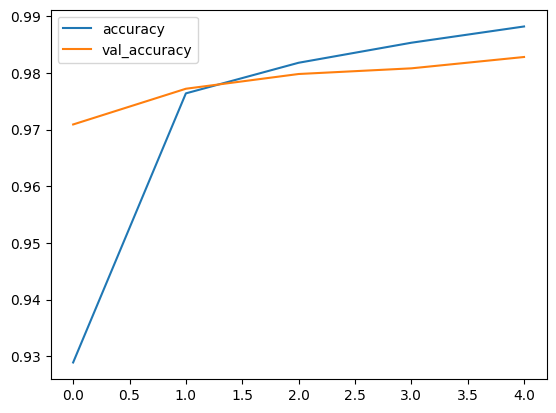

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

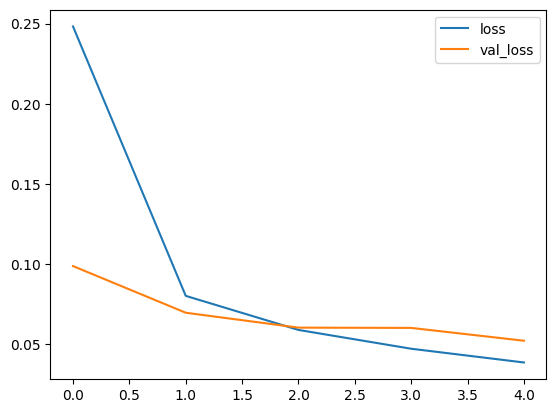

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 5ms/step


In [ ]:
print("NAVYA-212221230069")
print(confusion_matrix(y_test,x_test_predictions))

NAVYA-212221230069
[[ 971    2    3    0    0    1    2    1    0    0]
 [   0 1130    3    0    0    1    1    0    0    0]
 [   1    3 1015    0    2    0    2    7    2    0]
 [   0    0    3  986    0   12    0    5    1    3]
 [   1    0    3    0  971    0    1    1    1    4]
 [   0    0    0    3    0  887    2    0    0    0]
 [   6    3    1    0    1    4  943    0    0    0]
 [   0    5    7    2    0    1    0 1010    1    2]
 [   5    1    6    1    3    4    1    4  947    2]
 [   1    4    0    3   12   10    0    8    3  968]]


In [ ]:
print("NAVYA-212221230069")
print(classification_report(y_test,x_test_predictions))

NAVYA-212221230069
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.96      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Prediction for a single input**



In [81]:
img = image.load_img('n3.jpeg')

In [82]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [83]:
img = image.load_img('n3.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [84]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 32ms/step


In [85]:
print(x_single_prediction)

[6]


NAVYA-212221230069


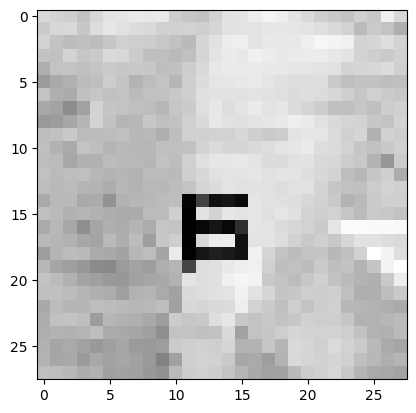

In [86]:
print("NAVYA-212221230069")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [87]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [88]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [89]:
print("NAVYA-212221230069")
print(x_single_prediction)

NAVYA-212221230069
[6]
